In [1]:
#importing libraries
import numpy as np
import torch
import pandas as pd
import sklearn  
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from numba import njit, prange

In [2]:
#load dataset 
dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")

In [3]:
#dataset
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
#X Y split of the data
X = dataset.iloc[:,0:8].values        #.value convert the dataset type to numpy
Y = dataset.iloc[:,8].values

#converting X Y into tensors
X = torch.tensor(X, dtype= torch.float32)
Y = torch.tensor(Y, dtype= torch.float32)

In [5]:
print(X.shape, Y.shape)

torch.Size([767, 8]) torch.Size([767])


In [6]:
###Test train split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)


In [7]:
print(X_train.shape , X_test.shape, Y_train.shape, Y_test.shape, type(X_train))

torch.Size([613, 8]) torch.Size([154, 8]) torch.Size([613]) torch.Size([154]) <class 'torch.Tensor'>


In [8]:
#model definition
class NN_model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1 = 20, hidden_layer2 = 20, output_features=1):
        super().__init__()
        self.from_input_to_H1 = nn.Linear(input_features, hidden_layer1)
        self.from_H1_to_H2 = nn.Linear(hidden_layer1,hidden_layer2)
        self.from_H2_to_output = nn.Linear(hidden_layer2,output_features)
        #self.relu = nn.ReLU()
    def forward(self,x):
        x = F.relu(self.from_input_to_H1(x))
        x = F.relu(self.from_H1_to_H2(x))
        x = F.sigmoid(self.from_H2_to_output(x))
        return x
        

In [9]:
torch.manual_seed(20)
 

In [10]:
#model creating
model1 = NN_model()
loss_fn1 = nn.BCELoss()
optimizer1 = optim.Adam(model1.parameters(),lr=0.0001)
model2= NN_model()
loss_fn2 = nn.BCELoss()
optimizer2 = optim.Adam(model2.parameters(),lr=0.00001)

In [11]:
def model_fn(X_train, Y_train, model, optimizer, loss_fn):
    epoch = 100
    batch_size = 20
    loss_calc=[]
    for i in range (epoch):
        epoch_loss = 0
        for a in range(0, len(X_train), batch_size):
            X_batch = X_train[a:a+batch_size]
            optimizer.zero_grad()
            Y_pred = model(X_batch)
            Y_batch = Y_train[a:a+batch_size]
            loss = loss_fn(Y_pred.squeeze(), Y_batch)
            loss.backward()
            optimizer.step()
            # print(loss)
            epoch_loss = epoch_loss + loss.item()
            
        epoch_loss = epoch_loss/(len(X_train)/batch_size)
        loss_calc.append(epoch_loss)

        if i % 100 ==0:
            print("Epoch number",i)
            print(epoch_loss)

    plt.plot(loss_calc)
    plt.legend()
    plt.show()

Epoch number 0
0.9248186305140983


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


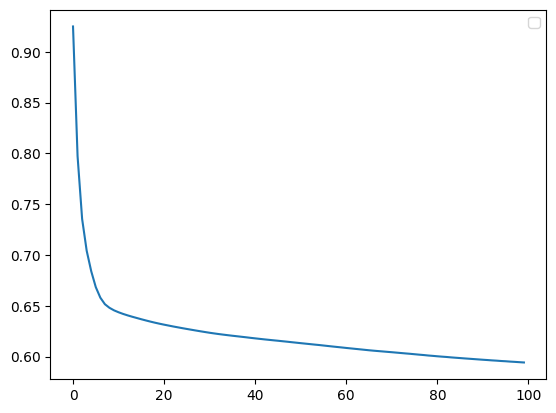

CPU times: user 1.55 s, sys: 104 ms, total: 1.65 s
Wall time: 1.52 s


In [12]:
%%time
model_fn(X_train,Y_train, model1, optimizer1,loss_fn1)

In [13]:
#accuracy
def accuracy (model, X_test):
    with torch.no_grad():
        Y_val = model(X_test)
        # print(Y_val)
        # print(Y_val.shape)
        a=0
        # Y_val_round = round(Y_val)
        a=((Y_val.round()==Y_test).float()).sum()
        acc = a/len(Y_val)
        print(acc)
        #     a+=1
        # acc= a/len(Y_val)
        

In [14]:
accuracy(model1, X_test)

tensor(85.0519)


In [15]:
#augmentation
std = 0.1
noise1 = torch.randn_like(X_train) * std
X_train_aug1 = X_train + noise1
noise2 = torch.randn_like(X_train) * std
X_train_aug2 = X_train + noise2
noise3 = torch.randn_like(X_train) * std
X_train_aug3 = X_train + noise3
X_aug = torch.cat((X_train, X_train_aug1 , X_train_aug2, X_train_aug3),0)
print(X_aug.shape)
# print(X_train_aug1.shape)

Y_aug = torch.cat((Y_train, Y_train, Y_train, Y_train),0)

torch.Size([2452, 8])


Epoch number 0
1.864775189762209


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


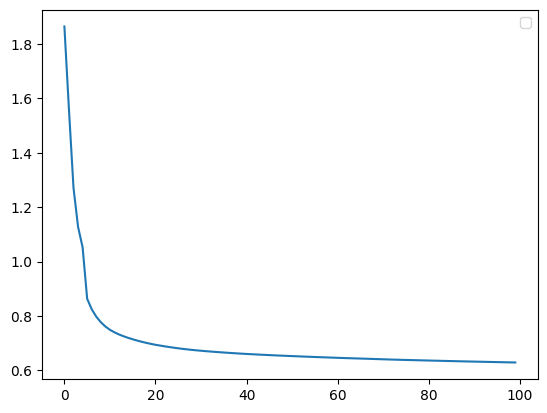

In [16]:
model_fn(X_aug,Y_aug, model2, optimizer2,loss_fn2)

In [17]:
accuracy(model2, X_test)

tensor(87.6494)
